In [2]:
# execfile ("D:/measuring/analysis/scripts/setup_analysis.py")

import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
from analysis.lib.sim import electron_nuclear_sim2 as nsc; reload(nsc)


<module 'analysis.lib.sim.electron_nuclear_sim2' from 'analysis/lib/sim/electron_nuclear_sim2.pyc'>

## Fingerprint

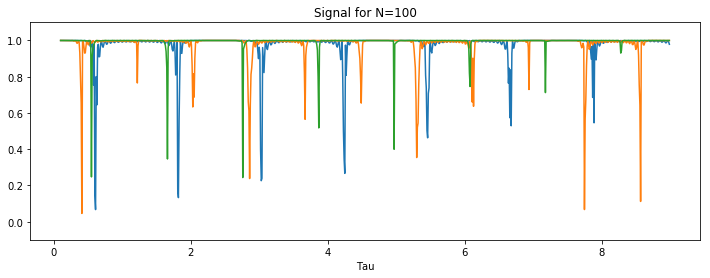

18.1824700832


In [347]:
reload(nsc)
NVsys = nsc.NV_system(use_hf_library = True,B_field = 400.0)
import time
nsc.C13_fingerprint(NVsys,N=100,tau_range =  np.arange(0.1e-6,9e-6,1e-8),calc_indiv=True,quick_calc = False)

## Prepare X, and measure XY

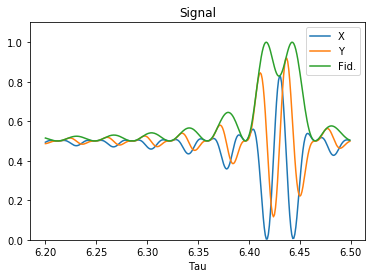

Max fid.  0.999811861503  at  6.417


In [348]:
from analysis.lib.sim import electron_nuclear_sim2 as nsc; reload(nsc)

NVsys = nsc.NV_system(use_hf_library = True)
nsc.prepare_X_and_measure_XY(NVsys,tau_range =  np.arange(6.2e-6,6.5e-6,1e-9),meas='eXY')

### Finite pulse durations

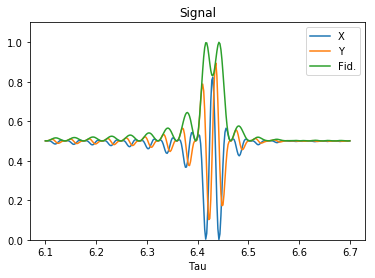

Max fid.  0.998956722656  at  6.442


In [355]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')

# nsc.C13_fingerprint(NVsys,N=32,tau_range =  np.arange(6.1e-6,6.7e-6,2e-9),quick_calc = False)
nsc.prepare_X_and_measure_XY(NVsys,tau_range =  np.arange(6.1e-6,6.7e-6,2e-9),meas='eXY')

# Monte Carlo

## Microwave Pi pulse fidelities

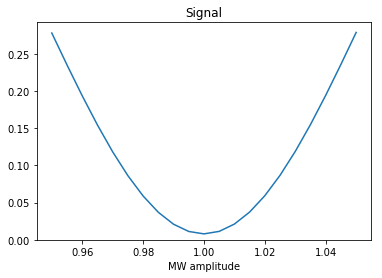

Min sig.  0.00795068115332  at  1.0


In [350]:
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,carbon_params = [],inc_nitrogen=True,pulse_shape='Hermite')
fids = nsc.sweep_MW_amp(NVsys,N=11,amp_range=np.arange(0.95,1.05,0.005))

Infidelity is 0.022151 \pm 0.002301


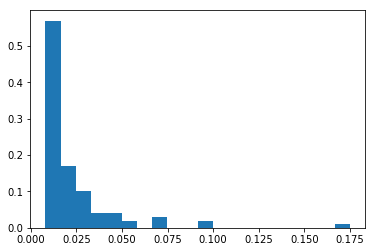

In [356]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,carbon_params = [],inc_nitrogen=True,pulse_shape='Hermite')
infids = nsc.MonteCarlo_MWFid(NVsys,sigma=0.01,mean=1.0,N_rand=100)

plt.figure()
weights = np.ones_like(infids)/len(infids)
plt.hist(infids,bins = 20, weights = weights)
plt.show()
plt.close()

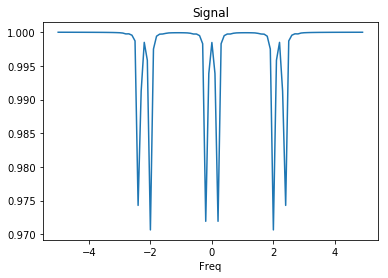

In [357]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=10000e-9,use_hf_library = True,inc_nitrogen=True,pulse_shape='square',scheme="simple")
# NVsys = nsc.NV_system(carbon_params = [],inc_nitrogen=True,scheme="XY8")

dd = nsc.dark_esr(NVsys)

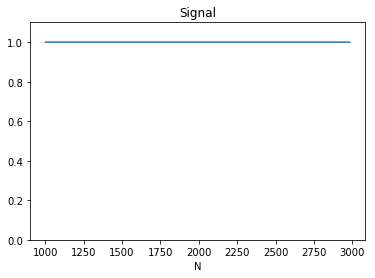

In [353]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9, tau = 2.6e-6,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')
# NVsys = nsc.NV_system(carbon_params = [],inc_nitrogen=True,scheme="XY8")

dd = nsc.dynamical_decouple(NVsys,scheme="XY8")


## Prepare and measure fidelities

Fidelity is 0.978672 \pm 0.023219


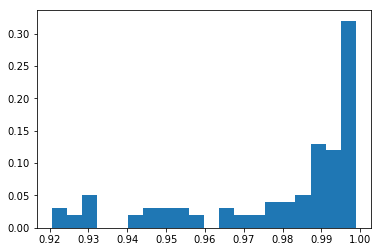

In [361]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=100e-9,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')
infids = nsc.MonteCarlo_MWAmp_CGate_fid(NVsys,tau=6.442e-6,sigma=0.01,mean=1.0, meas = 'eXY')

plt.figure()
weights = np.ones_like(infids)/len(infids)
plt.hist(infids,bins = 20, weights = weights)
plt.show()
plt.close()

Fidelity is 0.998884 \pm 0.000756


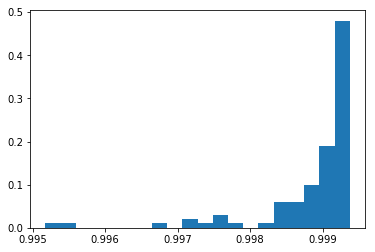

In [364]:
reload(nsc)
NVsys = nsc.noisy_NV_system(mw_duration=10e-9,use_hf_library = True,inc_nitrogen=True,pulse_shape='Hermite')
infids = nsc.MonteCarlo_MWAmp_CGate_fid(NVsys,tau=6.442e-6,sigma=0.01,mean=1.0, meas = 'eXY')

plt.figure()
weights = np.ones_like(infids)/len(infids)
plt.hist(infids,bins = 20, weights = weights)
plt.show()
plt.close()